In [1]:
%%capture
!pip install beautifulsoup4

In [2]:
import requests
from bs4 import BeautifulSoup
import json
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt

In [3]:
MAIN_URL = 'https://yandex.ru/images/search?text='
query = 'кассовый чек'

In [4]:
resp = requests.get(MAIN_URL + query)

In [5]:
soup = BeautifulSoup(resp.text)

In [6]:
images = []

In [7]:
for img in soup.find_all('div', attrs={'data-bem': True}):
    try:
        img_src = json.loads(img['data-bem'])['serp-item']['preview'][0]['origin']['url']
        images.append(img_src)
    except:
        continue

In [8]:
images[:5]

['https://omskrevizor.ru/wp-content/uploads/kassovyj-chek2.jpg',
 'https://potrebprav.ru/wp-content/uploads/2017/03/potreb-42-768x948.jpg',
 'https://initpro.ru/kassa/assets/images/helpcenter/chaspred_18.jpg',
 'https://avatars.mds.yandex.net/get-zen_doc/3144955/pub_5edf49ff23f4620d047c1906_5edf4aa0a0c4f157ef8a3e69/scale_1200',
 'https://spb-kassa.ru/images/%D0%BC%D0%B5%D1%80%D0%BA%D1%83%D1%80%D0%B8%D0%B9_130%D1%84/%D0%BC%D0%B5%D1%80%D0%BA%D1%83%D1%80%D0%B8%D0%B9-130%D1%84_15_1000.jpg']

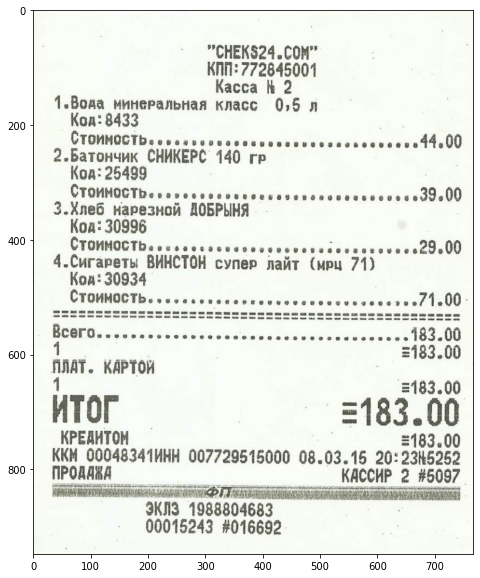

In [9]:
img = requests.get(images[1])
img = Image.open(BytesIO(img.content))
plt.figure(figsize=(10, 10))
plt.imshow(img);